# Project Methodology

### The Imports
`skfuzzy` and `skfuzzy.control`: Modules from `Scikit-Fuzzy` used to implement fuzzy logic control systems. `control` is a submodule for defining fuzzy variables and rules.

In [1]:
import numpy as np
import skfuzzy as fuzz
import skfuzzy.control as ctrl
import matplotlib.pyplot as plt

from typing import List
import pandas as pd
from datetime import datetime

## 1. Fuzzy Control System Creation
### Define Antecedents (Input Variables)
Antecedents represent the input factors affecting the fuzzy system. Each antecedent is defined with a name and a range of values.

- `body_temperature`: Represents a dog's body temperature in degrees Celsius, ranging from 34.0 to 44.0 with a step of 0.1. The average temperature for healthy dogs is noted as 38.3–39.2°C in the comment.

<br> <!-- Adds a single line break -->

- `heart_rate`: Represents the dog's heart rate in beats per minute (bpm), with values ranging from 0 to 190. The average range of 70–120 bpm is mentioned in the comment.

<br> <!-- Adds a single line break -->

- `barking_volume`: Represents the loudness of the dog's barking in decibels (dB), ranging from 0 to 113. The comment notes that 113.1 dB is the maximum barking volume observed


### Define Consequent (Output Variable)
Consequents represent the outputs or decisions the fuzzy system will produce based on the inputs.
- `is_dog_ok`: Represents the "well-being" status of the dog, ranging from 0 to 100. A higher value likely indicates better health or normal behaviour.

In [2]:
#_______ create fuzzy control system _______#
# average temp = 38.3 - 39.2
body_temperature = ctrl.Antecedent(np.arange(34.0,44.0,0.1), "body_temperature")

# heart rate average 70 - 120
heart_rate = ctrl.Antecedent(np.arange(0,190,1), "heart_rate")

# barking lvl, highest bark 113.1 db
barking_volume = ctrl.Antecedent(np.arange(0,113,1), "barking_volume")

# output variable
is_dog_ok = ctrl.Consequent(np.arange(0,100,1), "is_dog_ok")


In [3]:
#time_of_day['night'] = fuzz.

## 2. Define Membership Functions
 Membership functions (MF) are essential in fuzzy systems for defining fuzzy sets and quantifying vagueness. The MF types used in this project are as follows:

- **`fuzz.gaussmf`**: 
    - Defines Gaussian membership functions. A Gaussian function is bell-shaped and controlled by:
        - `mean`: The centre of the bell curve where membership is the highest (1.0).
        - `sigma`: The standard deviation, controlling the spread (width) of the bell
 
 <br> <!-- Adds a single line break -->
 
- **`fuzz.gbellmf`**:
    - This defines a Generalised Bell Membership Function. Where,
        - **`a`**: Determines the width of the bell curve.
        - **`𝑏`**: Controls the steepness of the curve (higher values make it steeper).
        - **`c`**: The centre of the bell curve, where membership degree is 1.

<br> <!-- Adds a single line break -->

### Defining Membership Functions for `body_temperature[]`:
- Membership functions, using Gaussian function, map crisp input values (e.g., body temperature in °C) into degrees of membership in fuzzy sets (e.g., "Low," "Normal," "High").
- `low`: A triangular membership function (`trimf`) defines the "Low" category for body temperature. The membership degree is:
    - 1 at the lower bound (34°C)
    - Decreases linearly to 0 at 38.75°C
    - Values above 38.75°C do not belong to this category.
- `normal`: A Gaussian membership function (`gaussmf`) defines the "Normal" category:
    - Peaks at the mean (38.75°C) with a membership degree of 1.
    - Spreads symmetrically with a standard deviation of 0.6, creating a bell-shaped curve.
- `high`: A triangular membership function (`trimf`) defines the "High" category. The membership degree:
    - Increases linearly from 0 at 38.75°C to 1 at the upper bound (44°C)
    - Remains 1 for temperatures beyond 44°C

 <br> <!-- Adds a single line break -->

#### Defining Membership Functions for `is_dog_ok[]`:
The fuzzy sets for "is dog ok?" (output variable) use similar membership functions but focus on the dog's overall condition.
- These are directly derived from `body_temperature` for demonstration purposes. They represent "Low," "Normal," and "High" categories for evaluating the dog's condition.

 <br> <!-- Adds a single line break -->
 
#### The plotting shows:
This visualisation helps understand how crisp values of body temperature (e.g., 36°C or 40°C) are fuzzified into degrees of membership across these categories.
- The x-axis as the body temperature range (34°C to 44°C).
- The y-axis as the membership degree (0 to 1).
- Three overlapping membership functions:
    - "Low": A triangular function with full membership at 34°C.
    - "Normal": A Gaussian function centred at 38.75°C with moderate spread.
    - "High": A triangular function peaking at 44°C.

 <br> <!-- Adds a single line break -->
 
Visualisation confirms the accuracy and overlap of the fuzzy sets, ensuring no gaps or ambiguities in the input range.


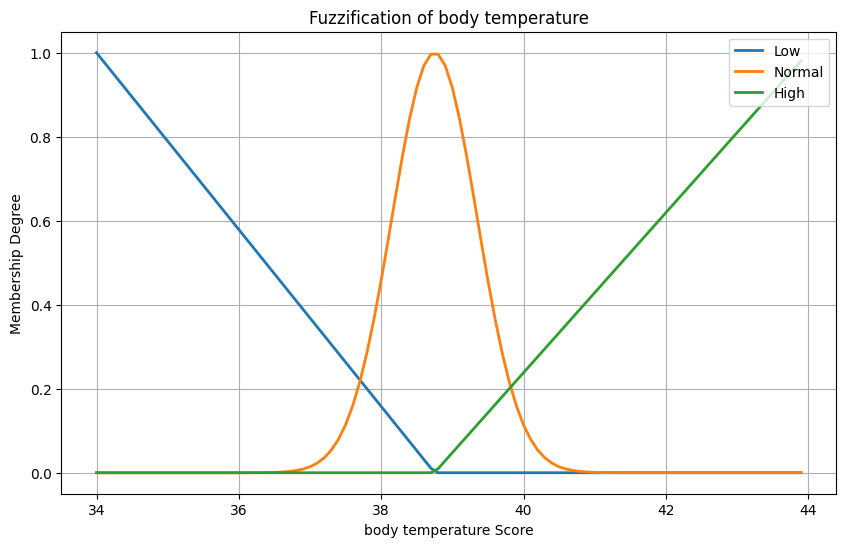

In [4]:
#define membership functions for body temperature
body_temperature['low'] = fuzz.trimf(body_temperature.universe, [34,34,38.75])
body_temperature['normal'] = fuzz.gaussmf(body_temperature.universe, mean = 38.75, sigma = 0.6)
body_temperature['high'] = fuzz.trimf(body_temperature.universe, [38.75,44,44])

# Define membership functions for "is dog ok?" categories
low = fuzz.trimf(body_temperature.universe, [34,34,38.75])
normal = fuzz.gaussmf(body_temperature.universe, mean = 38.75, sigma = 0.6)
high = fuzz.trimf(body_temperature.universe, [38.75,44,44])


# Plotting the membership functions
plt.figure(figsize=(10, 6))
plt.plot(body_temperature.universe, low, label='Low', linewidth=2)
plt.plot(body_temperature.universe, normal, label='Normal', linewidth=2)
plt.plot(body_temperature.universe, high, label='High', linewidth=2)

# Add titles and labels
plt.title("Fuzzification of body temperature")
plt.xlabel("body temperature Score")
plt.ylabel("Membership Degree")
plt.legend(loc="upper right")
plt.grid(True)
plt.show()

### Membership Function for `heart_rate[]`:
Membership functions, using Generalised Bell function, represent the degree to which a crisp value (e.g., a specific heart rate) belongs to a fuzzy set ("Low," "Normal," or "High"). 

<br> <!-- Adds a single line break -->

The parameters of **`heart_rate[]`**:

- **`low`**: Represents low heart rates.
    - `a=30`: Moderate width for the curve.
    - `b=2`: Smooth transition (not too steep).
    - `c=0`: Centre at 0 bpm.
- **`normal`**: Represents normal heart rates.
    - `a=40`: Wider curve for healthy heart rates.
    - `b=2`: Smooth transition.
    - `c=95`: Centre at 95 bpm.
- **`high`**: Represents high heart rates.
    - `a=30`: Moderate width.
    - `b=2`: Smooth transition.
    - `c=190`: Centre at 190 bpm


<br> <!-- Adds a single line break -->

#### Preparing for plotting
- **`heart_rate.universe`**: Represents the range of heart rate values (e.g., from 0 to 200 bpm).
- **`fuzz.gbellmf`**: Evaluates the membership degree for every value in heart_rate.universe for the fuzzy sets "Low," "Normal," and "High".

<br> <!-- Adds a single line break -->

#### The plot will show three overlapping bell curves:
This visualisation ensures that heart rates across the range (0–190 bpm) are classified into fuzzy sets with varying degrees of membership, accounting for overlap and gradual transitions.

- **"Low"**: Centred at 0 bpm, representing low heart rates.
- **"Normal"**: Centred at 95 bpm, representing normal heart rates.
- **"High"**: Centred at 190 bpm, representing high heart rates.

<br> <!-- Adds a single line break -->

The curves:
- Smoothly transition between categories.
- Allow a single heart rate to have partial membership in multiple sets (e.g., a heart rate of 100 bpm might partially belong to both "Normal" and "High").

### Key Points
- Generalised Bell Functions provide flexibility in controlling the shape of fuzzy sets by adjusting width (a), slope (b), and centre (c).
- The overlap between fuzzy sets ensures that values near category boundaries (e.g., 85 bpm) are appropriately classified with partial memberships.



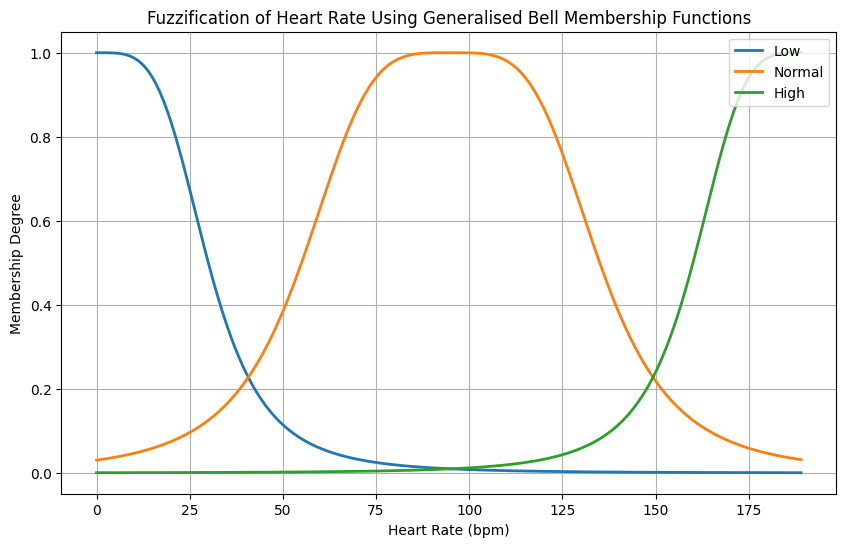

In [5]:
# Define membership functions for heart rate using Generalised Bell
heart_rate['low'] = fuzz.gbellmf(heart_rate.universe, a=30, b=2, c=0)
heart_rate['normal'] = fuzz.gbellmf(heart_rate.universe, a=40, b=2, c=95)
heart_rate['high'] = fuzz.gbellmf(heart_rate.universe, a=30, b=2, c=190)

# Plotting the membership functions
low = fuzz.gbellmf(heart_rate.universe, a=30, b=2, c=0)
normal = fuzz.gbellmf(heart_rate.universe, a=40, b=2, c=95)
high = fuzz.gbellmf(heart_rate.universe, a=30, b=2, c=190)

plt.figure(figsize=(10, 6))

plt.plot(heart_rate.universe, low, label='Low', linewidth=2)
plt.plot(heart_rate.universe, normal, label='Normal', linewidth=2)
plt.plot(heart_rate.universe, high, label='High', linewidth=2)

# Add titles and labels
plt.title("Fuzzification of Heart Rate Using Generalised Bell Membership Functions")
plt.xlabel("Heart Rate (bpm)")
plt.ylabel("Membership Degree")
plt.legend(loc="upper right")
plt.grid(True)
plt.show()


### Membership Function for `barking_volume`:
Membership functions classify barking volume into fuzzy sets: "quiet," "moderate," and "loud." These sets are represented by Gaussian membership functions.

<br> <!-- Adds a single line break -->

The Gaussian function parameters:
- **`quiet`:**
  - `mean=0`: Maximum membership at 0 dB (no barking).
  - `sigma=25`: Gradually declines as volume increases, representing quiet barking.

- **`moderate`:**
  - `mean=56.5`: Maximum membership at 56.5 dB, representing moderate barking.
  - `sigma=20`: A narrower spread than "quiet" and "loud," focusing on mid-range barking volumes.

- **`loud`:**
  - `mean=113`: Maximum membership at 113 dB (very loud barking).
  - `sigma=25`: Gradually declines for lower volumes.

<br> <!-- Adds a single line break -->

These calculate membership degrees for all values in the range (`barking_volume.universe`) to prepare for plotting.

<br> <!-- Adds a single line break -->

#### Plotting shows
The plot will show three overlapping Gaussian curves:

- **"Quiet"**: A bell curve centred at 0 dB, with membership gradually decreasing for higher barking volumes.
- **"Moderate"**: A narrower bell curve centred at 56.5 dB, focusing on mid-range barking volumes.
- **"Loud"**: A bell curve centred at 113 dB, representing loud barking, with membership gradually decreasing for lower volumes.

<br> <!-- Adds a single line break -->

### Key points

- The Gaussian curves ensure smooth transitions between categories, meaning a barking volume can belong partially to more than one category.
- For example, a barking volume of 50 dB might have moderate membership in both "quiet" and "moderate," reflecting the fuzzy nature of real-world barking classifications.
- Visualising the membership functions confirms their ranges and overlaps, ensuring that all possible barking volumes (0–113 dB) are covered.


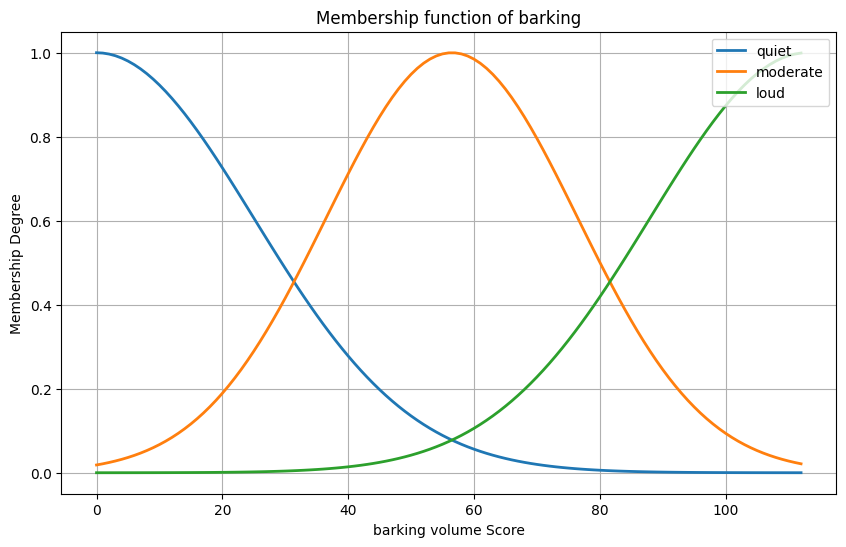

In [6]:
#define membership functions for barking
barking_volume['quiet'] = fuzz.gaussmf(barking_volume.universe, mean=0, sigma=25)
barking_volume['moderate'] = fuzz.gaussmf(barking_volume.universe, mean=56.5, sigma=20)
barking_volume['loud'] = fuzz.gaussmf(barking_volume.universe, mean=113, sigma=25)

# Plotting the member function
quiet = fuzz.gaussmf(barking_volume.universe, mean=0, sigma = 25)
moderate = fuzz.gaussmf(barking_volume.universe, mean=56.5, sigma = 20)
loud = fuzz.gaussmf(barking_volume.universe, mean=113, sigma = 25)

plt.figure(figsize=(10, 6))

plt.plot(barking_volume.universe, quiet, label='quiet', linewidth=2)
plt.plot(barking_volume.universe, moderate, label='moderate', linewidth=2)
plt.plot(barking_volume.universe, loud, label='loud', linewidth=2)

# Add titles and labels
plt.title("Membership function of barking")
plt.xlabel("barking volume Score")
plt.ylabel("Membership Degree")
plt.legend(loc="upper right")
plt.grid(True)
plt.show()

### Membership Function for `is_dog_ok[]`
This code defines fuzzy membership functions for the "`is_dog_ok`" variable, representing the condition of a dog, and visualises these membership functions

<br> <!-- Adds a single line break -->

#### Assigning MF to `is_dog_ok[]`
The membership functions classify the dog's condition into fuzzy sets: "perfect," "normal," "need help," and "urgent."
- **"Perfect"**: A Gaussian curve centred at 0, representing ideal conditions.
- **"Normal"**: A Generalised Bell curve centred at 30, representing average or normal conditions.
- **"Need Help"**: A Gaussian curve centred at 70, indicating the dog may need attention.
- **"Urgent"**: A Gaussian curve centred at 100, representing a critical situation requiring immediate action.

<br> <!-- Adds a single line break -->

#### Define universe for `is_dog_ok_universe = np.arange(0, 100, 1)`
- Defines the range of possible scores for "`is_dog_ok`" from 0 to 100, incrementing by 1.
- This range will be used to compute membership degrees for each fuzzy set.

<br> <!-- Adds a single line break -->

#### Membership functions plotting
- Computes membership degrees for each value in `is_dog_ok_universe`.
- These arrays (`perfect_dog`, `normal_dog`, etc.) will be plotted to visualise how condition scores map to fuzzy sets:
    - `perfect_dog`: A narrow Gaussian curve centred at 0.
    - `normal_dog`: A Generalised Bell curve centred at 30, with a wider base.
    - `need_help_dog`: A Gaussian curve centred at 70, with a moderate spread.
    - `urgent_dog`: A sharp Gaussian curve centred at 100.

<br> <!-- Adds a single line break -->
Plotting the graph:
   - Title: "Membership Functions for Dog's Condition."
   - X-axis Label: "Condition Score" (e.g., 0 = perfect, 100 = urgent).
   - Y-axis Label: "Membership Degree" (0 to 1).
   - Legend: Displays the fuzzy set names.
   - Grid: Adds gridlines for clarity.
   - Show: Displays the plot.
   
<br> <!-- Adds a single line break -->

#### Plotted graph shows

1. **"Perfect"**: A narrow Gaussian curve peaking at 0 (ideal condition).
2. **"Normal"**: A Generalised Bell curve peaking at 30 (acceptable condition range).
3. **"Need Help"**: A Gaussian curve centred at 70, indicating mild to severe concerns.
4. **"Urgent"**: A sharp Gaussian curve peaking at 100, representing critical cases.


### Key Points
- The "perfect" and "urgent" curves are Gaussian, offering smooth, narrow membership transitions.
- The "normal" curve is a Generalised Bell, offering more flexibility to represent a broader acceptable range.
- The overlap between fuzzy sets ensures gradual transitions, reflecting real-world uncertainty (e.g., a score of 50 might partially belong to both "Normal" and "Need Help").
- Visualisation confirms proper coverage and distribution of fuzzy sets over the `is_dog_ok_universe`.


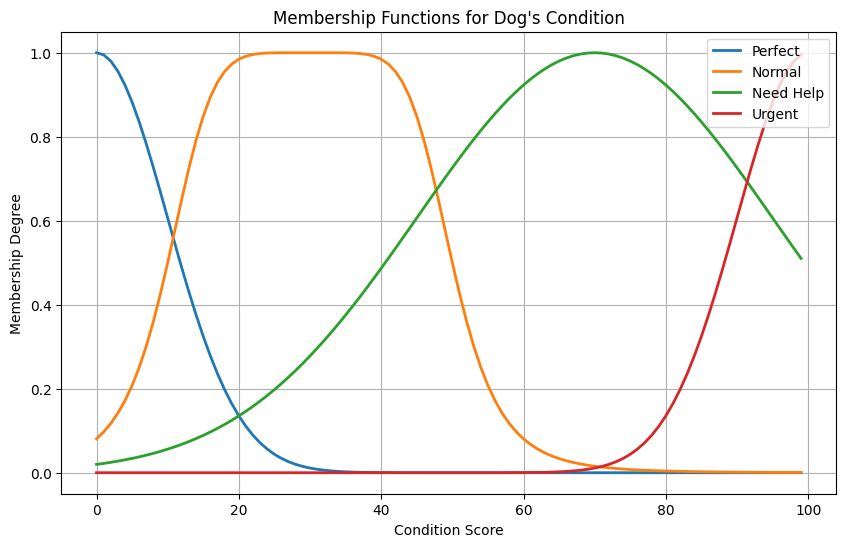

In [7]:
is_dog_ok["perfect"] = fuzz.gaussmf(is_dog_ok.universe, mean=0, sigma = 15)
is_dog_ok["normal"] = fuzz.gbellmf(x = is_dog_ok.universe, a = 15, b = 4, c = 30)
is_dog_ok["need help"] = fuzz.gaussmf(is_dog_ok.universe, mean=70, sigma = 25)
is_dog_ok["urgent"] = fuzz.gaussmf(is_dog_ok.universe, mean=100, sigma = 10)

# Define the universe for "is dog ok?" variable
is_dog_ok_universe = np.arange(0, 100, 1)

# Define membership functions for "is dog ok?" categories
perfect_dog = fuzz.gaussmf(is_dog_ok_universe, mean=0, sigma=10)
normal_dog = fuzz.gbellmf(is_dog_ok_universe, a = 20, b = 3, c = 30)
need_help_dog = fuzz.gaussmf(is_dog_ok_universe, mean=70, sigma=25)
urgent_dog = fuzz.gaussmf(is_dog_ok_universe, mean=100, sigma=10)

# Plotting the membership functions
plt.figure(figsize=(10, 6))
plt.plot(is_dog_ok_universe, perfect_dog, label='Perfect', linewidth=2)
plt.plot(is_dog_ok_universe, normal_dog, label='Normal', linewidth=2)
plt.plot(is_dog_ok_universe, need_help_dog, label='Need Help', linewidth=2)
plt.plot(is_dog_ok_universe, urgent_dog, label='Urgent', linewidth=2)

# Add titles and labels
plt.title("Membership Functions for Dog's Condition")
plt.xlabel("Condition Score")
plt.ylabel("Membership Degree")
plt.legend(loc="upper right")
plt.grid(True)
plt.show()


## 3. Define Fuzzy Rules

The rules connect fuzzy input variables (e.g., body_temperature and heart_rate) to an output variable (is_dog_ok) based on specific conditions.

<br> <!-- Adds a single line break -->

`ctrl.Rule`: Represents a fuzzy logic rule.
- Antecedents (Inputs) for **`rule1`**:
    - `body_temperature['normal']` & `heart_rate['normal']`: Indicates a condition where both body temperature and heart rate are in the "normal" range.
- Consequent (Output):
    - `is_dog_ok['perfect']`: Sets the dog's condition to "perfect" if **`rule1`** conditions are satisfied.
- Purpose:
    - These rules determine the dog's condition based on fuzzy inputs.
    - Here: If the dog has normal body temperature and heart rate, the system infers that the dog is in perfect condition

In [8]:
#Define fuzzy rules
rule1 = ctrl.Rule(body_temperature['normal'] & heart_rate['normal'],is_dog_ok['perfect'])
rule2 = ctrl.Rule(body_temperature['high'] & heart_rate['high'],is_dog_ok['need help'])
rule3 = ctrl.Rule(body_temperature['low'] & heart_rate['low'],is_dog_ok['urgent'])

## 4. Defines a `dog` class

The **`Dog`** class provides a structure to **represent individual dog data**, including heart rate, body temperature, barking volume, and time of observation

<br> <!-- Adds a single line break -->

Attributes:
- **`time`**: The time of observation (e.g., "12:30").
- **`heart_rate`**: The dog's heart rate in bpm.
- **`body_temperature`**: The dog's body temperature in °C.
- **`barking_volume`**: The dog's barking volume in dB


In [9]:

class Dog:
    def __init__(self, time, heart_rate, body_temperature,barking_volume ):
        self.time = time
        self.heart_rate = heart_rate
        self.body_temperature = body_temperature
        self.barking_volume = barking_volume


## 5. Process Dog Data from CSV File
The **`data_process`** function reads a CSV file containing dog data, processes each row, and creates a list of **`Dog`** objects.

<br> <!-- Adds a single line break -->

Steps:
1. **Read CSV File**:
    - `datafile = pd.read_csv(file)`: Reads the data from the CSV file into a Pandas DataFrame
2. **Extract Rows**:
    - Loops through each row of the DataFrame to access individual columns (Time, Heart Rate, etc.).
3. **Parse Time**:
    - `datetime.strptime(time_str, '%H:%M').time()`: Converts time strings (e.g., "12:30") into Python `datetime.time` objects.
4. **Create Dog Objects**:
    - Extracts heart rate, body temperature, and barking volume from each row, converts them to integers, and uses them to create a Dog object.
5. **Store in List**:
    - Each Dog object is added to the **`dog_data_list`**.


The output:
- The function returns a list of `Dog` objects, where each object represents one row of data from the CSV file.





In [10]:
        
def data_process(file):
    dog_data_list = []

    
    datafile = pd.read_csv(file)
    
    # Loop through each row to create Dog objects
    for i in range(len(datafile)):
        # Extract each column directly
        time_str = datafile.loc[i, 'Time']
        heart_rate = datafile.loc[i, 'Heart Rate (bpm)']
        body_temp = datafile.loc[i, 'Body Temperature (°C)']
        barking = datafile.loc[i, 'Barking Volume (dB)']
        
        # Parse time as a datetime object in HH:MM format
        time = datetime.strptime(time_str, '%H:%M').time()
        
        # Create a Dog object and add it to the list
        dog = Dog(time, int(heart_rate), int(body_temp), int(barking))
        dog_data_list.append(dog)
        
    return dog_data_list

## Running the project
This code processes dog data from a CSV file, applies a fuzzy control system to evaluate each dog's condition based on rules, and prints the results.

<br> <!-- Adds a single line break -->

### 1. Load the data:
   - **`file`**: Specifies the CSV file path containing dog data. Here, it points to Data/sick_dog_data.csv.
   - **`dog_data_list = data_process(file)`**: Calls the data_process function (defined earlier) to:
        - Read the CSV file.
        - Process its rows into a list of Dog objects, each containing attributes like `time`, `body_temperature`, `heart_rate`, and `barking_volume`.

In [11]:
#file='Data/fine_dog_data.csv'
file='Data/sick_dog_data.csv'
dog_data_list = data_process(file)

### 2. Create Fuzzy Control System

- **`ctrl.ControlSystem`**: Creates a fuzzy control system based on predefined rules (`rule1`, `rule2`, `rule3`).
- **`rule1` Example**: If body temperature and heart rate are both normal, the dog's condition is "perfect."
- **Purpose**: This system will be used to compute outputs (e.g., `"is_dog_ok"`) based on input values for body temperature and heart rate.

In [12]:
#create a control system and simulation
system = ctrl.ControlSystem([rule1,rule2,rule3])

### 3. Loop Through Each Dog's Data

Iterates through each `Dog` object in the **`dog_data_list`**.

<br> <!-- Adds a single line break -->

3.1 For each `Dog` object (`i`), the following steps are executed:
   - **`sim = ctrl.ControlSystemSimulation(system)`**:
        - Creates a simulation instance of the fuzzy control system.
        - Purpose: Simulates the fuzzy control system for each dog's data

3.2 Provide Inputs to the Simulation: **`sim.input[]`**:
   - Inputs the dog's body temperature (`i.body_temperature`) and heart rate (`i.heart_rate`) into the fuzzy system.
   - These values are used to evaluate the rules and compute the fuzzy output.

3.3 Compute the Fuzzy Output:
   -**`sim.compute()`**: Executes the fuzzy inference process:
   - Evaluates the fuzzy rules (`rule1`, `rule2`, `rule3`) using the inputs.
   - Computes the output fuzzy set (is_dog_ok) based on the membership functions and defuzzifies it to a crisp value.
 
3.4 Output the Result - Prints the result for each dog:
   - Time (i.time): The time of the observation.
   - Output Value (sim.output['is_dog_ok']): The defuzzified value of the output variable is_dog_ok.

<br> <!-- Adds a single line break -->

#### Script summary:
This script:
   - Reads and processes dog data from a CSV file.
   - Creates a fuzzy control system using predefined rules.
   - Simulates the fuzzy system for each dog's data to compute their condition (`is_dog_ok`).
   - Outputs the results with a timestamp for each observation.

### Key points:
- **Dynamic Evaluation**: Each dog's condition is evaluated individually using their unique data.
- **Fuzzy Rules Integration**: The fuzzy control system applies logical rules to determine the output.
- **Scalability**: The system can process large datasets by looping through the data list.



In [13]:

for i in dog_data_list:
# Input values
    sim = ctrl.ControlSystemSimulation(system)
    sim.input['body_temperature'] = i.body_temperature
    sim.input['heart_rate'] = i.heart_rate
    
# Compute the result
    sim.compute()

# Output the result
    print(  "time :" +str(i.time) + " | Output value for is_dog_ok: " + str(sim.output['is_dog_ok']))


time :00:00:00 | Output value for is_dog_ok: 12.86997519633006
time :00:05:00 | Output value for is_dog_ok: 13.121083906653661
time :00:10:00 | Output value for is_dog_ok: 13.084332021340078
time :00:15:00 | Output value for is_dog_ok: 12.95369191554313
time :00:20:00 | Output value for is_dog_ok: 13.049480673775513
time :00:25:00 | Output value for is_dog_ok: 12.896509343811047
time :00:30:00 | Output value for is_dog_ok: 13.159640218590242
time :00:35:00 | Output value for is_dog_ok: 13.084332021340078
time :00:40:00 | Output value for is_dog_ok: 13.121083906653661
time :00:45:00 | Output value for is_dog_ok: 12.86997519633006
time :00:50:00 | Output value for is_dog_ok: 13.049480673775513
time :00:55:00 | Output value for is_dog_ok: 13.199986435394703
time :01:00:00 | Output value for is_dog_ok: 13.016140591135112
time :01:05:00 | Output value for is_dog_ok: 12.86997519633006
time :01:10:00 | Output value for is_dog_ok: 12.924442898126584
time :01:15:00 | Output value for is_dog_ok:

In [14]:

# Evaluating the dogs conditions
def evaluate_dog_conditions(dog_data_list, system, is_dog_ok, output_var="is_dog_ok"):
    """
    Evaluate the condition of each dog based on fuzzy logic and print the results.

    Parameters:
    - dog_data_list: list of Dog objects containing the dog's data.
    - system: the fuzzy control system.
    - output_var: the name of the output variable (default: "is_dog_ok").

    Returns:
    - results: A list of dictionaries with evaluation results for each dog.
    """

    # Initiation
    results = []

    for i in dog_data_list:
        # Create a new simulation for each dog
        sim = ctrl.ControlSystemSimulation(system)

        # Assign all inputs
        sim.input['body_temperature'] = i.body_temperature
        sim.input['heart_rate'] = i.heart_rate
        # sim.input['barking_volume'] = i.barking_volume  # Uncomment if needed

        try:
            # Compute the result
            sim.compute()
            output_value = sim.output[output_var]

            # Calculate membership degrees for all terms in `is_dog_ok`
            membership_levels = {
                label: fuzz.interp_membership(
                    is_dog_ok.universe, is_dog_ok[label].mf, output_value
                )
                for label in is_dog_ok.terms
            }

            # Sort by membership degree (highest first)
            sorted_memberships = sorted(
                membership_levels.items(), key=lambda x: x[1], reverse=True
            )

            # Extracting the top two memberships
            top_two = sorted_memberships[:2]
            top_two_conditions = [
                f"{label} {degree * 100:.0f}%" for label, degree in top_two
            ]

            # Combine the conditions for output
            condition = ", ".join(top_two_conditions)

            # Store the result
            results.append({
                "time": i.time,
                "output_value": output_value,
                "condition": condition
            })

            # Print the result
            print(f"Time: {i.time} | Fuzzification value for {output_var}: {output_value:.2f} -> Condition: {condition}")

        except ValueError as e:
            print(f"Error for dog at time {i.time}: {e}")

    return results




# Plotting the bar graph for the results output (dog's condition)
def plot_dog_condition(results):
    """
    Plot a bar chart for the primary dog condition over a 24-hour schedule.

    Parameters:
    - results: List of dictionaries containing 'time' and 'condition' for each hour.
    """
    # Mapping conditions to numeric values and colours
    condition_mapping = {
        "perfect": {"value": 4, "colour": "#a8c9ca"},  # Opal
        "normal": {"value": 3, "colour": "#a6d301"},   # Pistachio
        "need help": {"value": 2, "colour": "#d37401"}, # Orange
        "urgent": {"value": 1, "colour": "#a90120"},    # Dark Red
        "unknown": {"value": 0, "colour": "gray"}      # Default for missing hours
    }

    # Extract reported times and conditions
    reported_times = [result['time'].strftime('%H:%M') for result in results]
    reported_conditions = [
        " ".join(result['condition'].split(",")[0].split()[:-1]).lower()
        for result in results
    ]

    # Create a mapping of time to condition for 24-hour tracking
    time_to_condition = {
        reported_times[i]: reported_conditions[i] if reported_conditions[i] in condition_mapping else "unknown"
        for i in range(len(reported_times))
    }

    # Generate a full 24-hour time schedule
    full_day_times = [f"{hour:02}:00" for hour in range(24)]

    # Fill missing hours with the default condition ("unknown")
    full_day_conditions = [
        time_to_condition[hour] if hour in time_to_condition else "unknown"
        for hour in full_day_times
    ]

    # Convert conditions to numeric values and colours
    numeric_conditions = [condition_mapping[cond]["value"] for cond in full_day_conditions]
    bar_colors = [condition_mapping[cond]["colour"] for cond in full_day_conditions]

    # Plot the bar chart
    plt.figure(figsize=(12, 6))
    bars = plt.bar(full_day_times, numeric_conditions, color=bar_colors, alpha=0.7)

    # Adding labels for clarity
    plt.yticks(
        [val["value"] for val in condition_mapping.values()],
        [key.capitalize() for key in condition_mapping.keys()],
        fontsize=18  # Increased by 50%
    )
    plt.xlabel("Time (Hour)", fontsize=18)  # Increased by 50%
    # plt.ylabel("Condition", fontsize=18)  # Increased by 50% if needed
    plt.title("Dog Condition Over 24 Hours", fontsize=21)  # Increased by 50%
    plt.xticks(rotation=45, fontsize=18)  # Increased by 50%
    plt.grid(axis='y', linestyle='--', alpha=0.7)

    # Display the chart
    plt.tight_layout()
    plt.show()




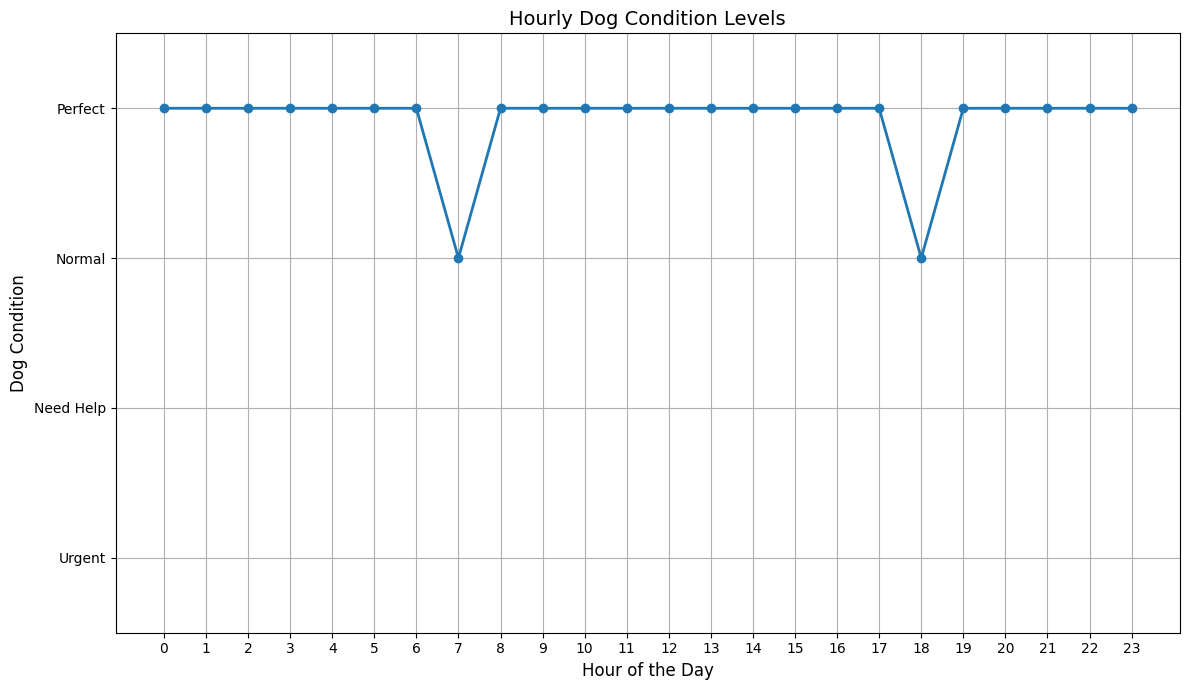

In [15]:
import matplotlib.pyplot as plt
import pandas as pd
from collections import defaultdict

# Dictionary to store hourly data
hourly_data = defaultdict(list)

for i in dog_data_list:
    # Input values
    sim = ctrl.ControlSystemSimulation(system)
    sim.input['body_temperature'] = i.body_temperature
    sim.input['heart_rate'] = i.heart_rate

    # Compute the result
    sim.compute()
    output_value = sim.output['is_dog_ok']

    # Group by hour
    hour = i.time.hour
    hourly_data[hour].append(output_value)

# Calculate average condition for each hour
hourly_avg = {hour: sum(values) / len(values) for hour, values in hourly_data.items()}

# Define condition mapping
def get_condition_level(value):
    if 0 <= value < 25:
        return 3  # Perfect
    elif 25 <= value < 50:
        return 2  # Normal
    elif 50 <= value < 75:
        return 1  # Need Help
    else:
        return 0  # Urgent

# Create a DataFrame for easier plotting
hourly_df = pd.DataFrame.from_dict(hourly_avg, orient='index', columns=['Average Condition'])
hourly_df['Condition Level'] = hourly_df['Average Condition'].apply(get_condition_level)
hourly_df.sort_index(inplace=True)

# Plotting
plt.figure(figsize=(12, 7))
plt.plot(hourly_df.index, hourly_df['Condition Level'], marker='o', linestyle='-', linewidth=2, label='Dog Condition')

# Adjust the y-axis to display condition labels
plt.yticks(ticks=[0, 1, 2, 3], labels=["Urgent", "Need Help", "Normal", "Perfect"])
plt.ylim(-0.5, 3.5)  # Adjust limits for better spacing

# Add labels, title, and grid
plt.title("Hourly Dog Condition Levels", fontsize=14)
plt.xlabel("Hour of the Day", fontsize=12)
plt.ylabel("Dog Condition", fontsize=12)
plt.xticks(range(24))  # Ensure all 24 hours are shown
plt.grid(True)
plt.tight_layout()

# Display the plot
plt.show()





Time: 00:00:00 | Fuzzification value for is_dog_ok: 28.01 -> Condition: normal 79%, perfect 20%
Time: 00:05:00 | Fuzzification value for is_dog_ok: 28.01 -> Condition: normal 79%, perfect 20%
Time: 00:10:00 | Fuzzification value for is_dog_ok: 28.01 -> Condition: normal 79%, perfect 20%
Time: 00:15:00 | Fuzzification value for is_dog_ok: 28.02 -> Condition: normal 79%, perfect 20%
Time: 00:20:00 | Fuzzification value for is_dog_ok: 28.02 -> Condition: normal 79%, perfect 20%
Time: 00:25:00 | Fuzzification value for is_dog_ok: 28.02 -> Condition: normal 79%, perfect 20%
Time: 00:30:00 | Fuzzification value for is_dog_ok: 28.03 -> Condition: normal 79%, perfect 20%
Time: 00:35:00 | Fuzzification value for is_dog_ok: 28.03 -> Condition: normal 79%, perfect 20%
Time: 00:40:00 | Fuzzification value for is_dog_ok: 33.38 -> Condition: need help 25%, normal 15%
Time: 00:45:00 | Fuzzification value for is_dog_ok: 33.38 -> Condition: need help 25%, normal 15%
Time: 00:50:00 | Fuzzification value

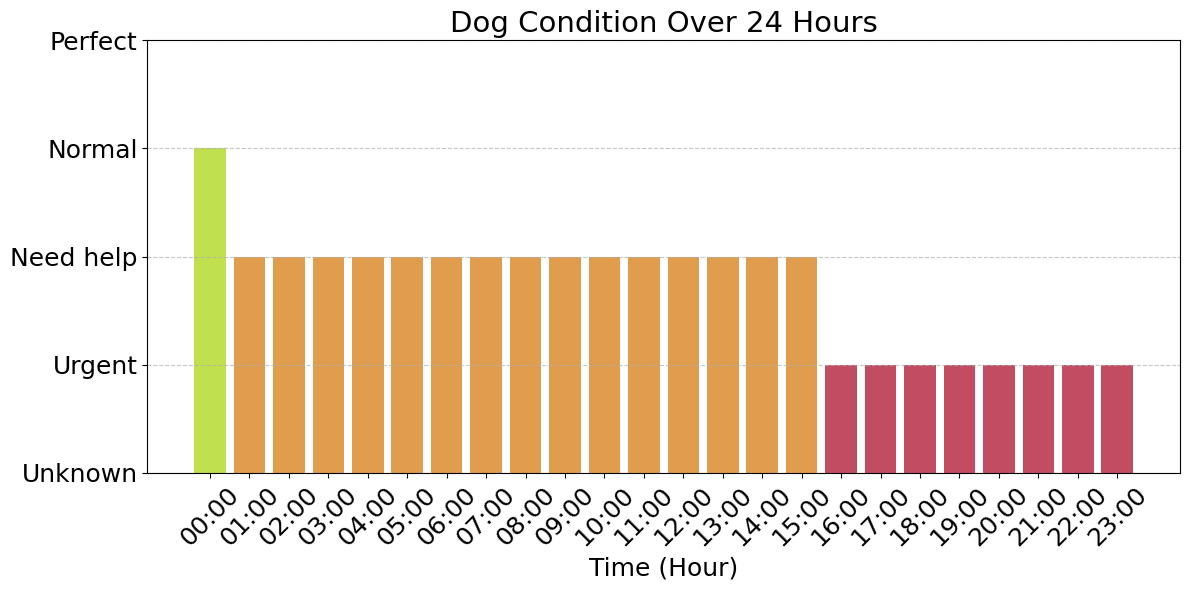

In [18]:
# main

import skfuzzy.control as ctrl
from membership_functions import create_membership_functions, plot_membership_functions
from data_analysis import data_process, evaluate_dog_conditions, plot_dog_condition
from fuzzy_rules import (rule1, rule2, rule3, rule4, rule5, rule6, rule7, rule8, rule9,)

# Create Membership Functions
body_temperature, heart_rate, barking_volume, is_dog_ok = create_membership_functions()

# Plot Membership Functions
"""
plot_membership_functions(body_temperature)
plot_membership_functions(heart_rate)
plot_membership_functions(barking_volume)
plot_membership_functions(is_dog_ok)
"""


#_______ create a control system and simulation _______ #
system = ctrl.ControlSystem([rule1,rule2,rule3, rule4, rule5, rule6, rule7, rule8, rule9])



#  ____________________  Running the Project ____________________ #
dog_1='Data/fine_dog_data.csv'
dog_2='Data/sick_dog_data.csv'
dog_3='Data/critical_dog_data.csv'

# change the number of the dog_ variable to change the data
dog_1_data_list = data_process(dog_3)

results = evaluate_dog_conditions(dog_1_data_list, system, is_dog_ok)
plot_dog_condition(results)

